<a href="https://colab.research.google.com/github/soumyakas/Apple-disease-classfication-with-VGG16/blob/main/appledisease_customtraining%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
train_path = '/content/gdrive/MyDrive/dataset/train'
test_path = '/content/gdrive/MyDrive/dataset/test'

In [ ]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import SGD
import tensorflow
from scipy.interpolate import make_interp_spline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.6.0
2.6.0


In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

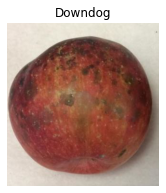

In [ ]:
img = load_img('/content/gdrive/MyDrive/dataset/test/Blotch_Apple/112.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Downdog')
plt.show()

In [ ]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

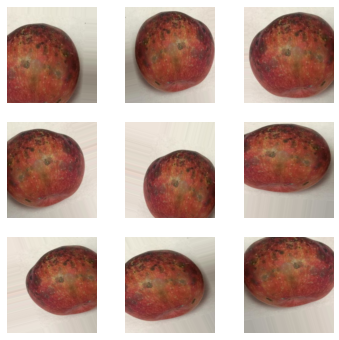

In [ ]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

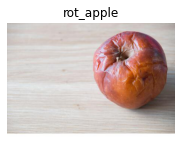

In [ ]:
img = load_img('/content/gdrive/MyDrive/dataset/test/Rotten_Apple/2an77pp.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('rot_apple')
plt.show()

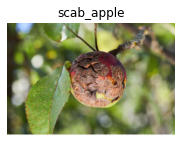

In [ ]:
img = load_img('/content/gdrive/MyDrive/dataset/test/Scab_Apple/2ea9em1.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('scab_apple')
plt.show()

In [ ]:
img_width, img_height = 224, 224

train_dir = train_path
test_dir = test_path
nb_epochs = 20
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [ ]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

6152


In [ ]:

# get number of images in test directory
nb_test_samples = 0
for r, dirs, files in os.walk(test_dir):
    for dr in dirs:
        nb_test_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_test_samples)

314


In [ ]:
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
test_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 6152 images belonging to 3 classes.


In [ ]:

# generate and store validation data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 314 images belonging to 3 classes.


In [ ]:
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(vgg16_model.input,predictions)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(train_generator,
                                                steps_per_epoch=5,
                                                epochs=100,
                                                validation_data=test_generator,
                                                validation_steps=5
                                                
                                                )
print('Training time: %s' % (now() - t))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
5/5 [==============================] - 224s 42s/step - loss: 1.4450 - accuracy: 0.4250 - val_loss: 1.0604 - val_accuracy: 0.3625
Epoch 2/100
5/5 [==============================] - 127s 28s/step - loss: 0.7222 - accuracy: 0.6938 - val_loss: 0.6731 - val_accuracy: 0.7625
Epoch 3/100
5/5 [==============================] - 101s 21s/step - loss: 0.7795 - accuracy: 0.6500 - val_loss: 0.7991 - val_accuracy: 0.6500
Epoch 4/100
5/5 [==============================] - 91s 19s/step - loss: 0.5986 - accuracy: 0.7375 - val_loss: 0.6927 - val_accuracy: 0.7188
Epoch 5/100
5/5 [==============================] - 82s 16s/step - loss: 0.5480 - accuracy: 0.8000 - val_loss: 0.7347 - val_accuracy: 0.6875
Epoch 6/100
5/5 [==============================] - 77s 16s/step - loss: 0.7188 - accuracy: 0.7125 - val_loss: 0.7606 - val_accuracy: 0.6687
Epoch 7/100
5/5 [==============================] - 75s 16s/step - loss: 0.6068 - accuracy: 0.7625 - val_loss: 0.6874 - val_accuracy: 0.7312
Epoch 8/100
5/5 [

In [ ]:
model.evaluate(train_generator)

193/193 [==============================] - 106s 548ms/step - loss: 0.1967 - accuracy: 0.9304


[0.1967434138059616, 0.9304291009902954]

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 6s 560ms/step - loss: 0.3806 - accuracy: 0.8471


[0.3805875778198242, 0.8471337556838989]

In [ ]:
model.save('appledisease_vgg16_model_tl.h5')

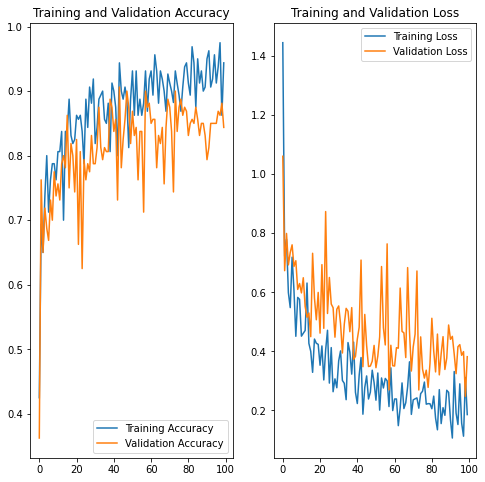

In [ ]:
acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']

loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']

epochs_range = range(100)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:100], label='Training Accuracy')
plt.plot(epochs_range, val_acc[:100], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:100], label='Training Loss')
plt.plot(epochs_range, val_loss[:100], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_generator.total_batches_seen

623

In [ ]:
num_images = len(glob.glob("/content/drive/MyDrive/appledisease/*.jpg"))
print(num_images)
'/content/gdrive/MyDrive/dataset/train/Blotch_Apple/10.jpg'

0


'/content/gdrive/MyDrive/dataset/train/Blotch_Apple/10.jpg'

In [ ]:
num_images = len(glob.glob("/content/gdrive/MyDrive/dataset/test/Blotch_Apple/*.jpg"))
print(num_images)

100


In [ ]:
predict_files = glob.glob("/content/gdrive/MyDrive/dataset/test/Blotch_Apple/*.jpg")
print(predict_files)

['/content/gdrive/MyDrive/dataset/test/Blotch_Apple/34.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/33.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/32.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/48.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/35.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/18.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/112.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/37.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/129.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/128.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/120.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/124.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/135.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/125.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/132.jpg', '/content/gdrive/MyDrive/dataset/test/Blotch_Apple/126.jpg', '/content/gdrive/MyDrive/datas

In [ ]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [ ]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [ ]:
apple_images = ["content/gdrive/MyDrive/dataset/test/Blotch_Apple/34.jpg", "/content/gdrive/MyDrive/dataset/test/Blotch_Apple/33.jpg"]

In [ ]:
final = pd.DataFrame()
final["image"] = apple_images
final["appledisease"] = predictor
final["Actual class"]=["Blotch apple"*100]
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100"  >'

pd.set_option('display.max_colwidth', None)

image_cols = ['image']  #<- define which columns will be used to convert to html

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html


display(HTML(final.to_html(escape=False ,formatters=format_dict)))

#final.head(num_images)

ValueError: ignored

In [ ]:
final = pd.DataFrame()
final["id"] = image_id
final["appledisease"] = predictor
final.head(num_images)

,id,appledisease
0,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
1,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
2,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
3,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,1
4,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
...,...,...
95,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,2
96,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
97,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0
98,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,0


In [ ]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [ ]:
final["appledisease"] = final["appledisease"].apply(lambda x: classes[x])
final.head(num_images)

,id,appledisease
0,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
1,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
2,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
3,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Rotten_Apple
4,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
...,...,...
95,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Scab_Apple
96,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
97,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
98,/content/gdrive/MyDrive/dataset/test/Blotch_Ap...,Blotch_Apple
